<a href="https://colab.research.google.com/github/yeneua/machine-learning/blob/main/03_1_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 03-1 K-최근접 이웃 회귀 **

In [41]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

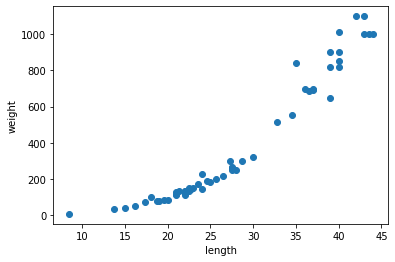

In [43]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_traget, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [45]:
test_array =np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [46]:
test_array = test_array.reshape(2,2)
print(test_array, test_array.shape)

[[1 2]
 [3 4]] (2, 2)


In [47]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


###결정계수(R^2)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
knr = KNeighborsRegressor()

In [51]:
knr.fit(train_input, train_target) #k최근접 이웃 회귀 모델 훈련

KNeighborsRegressor()

In [52]:
knr.score(test_input, test_target) #테스트 점수 평가

0.992809406101064

In [53]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae=mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


###과대적합 vs 

In [54]:
print(knr.score(train_input, train_target)) #훈련세트 점수

0.9698823289099254


In [56]:
print(knr.score(test_input,test_target)) #테스트세트점수

0.992809406101064


In [58]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [59]:
## 확인문제 2번

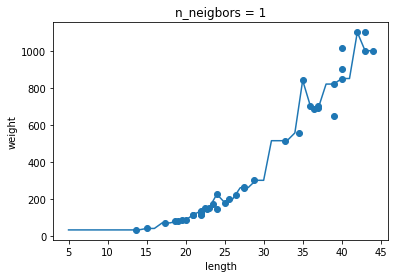

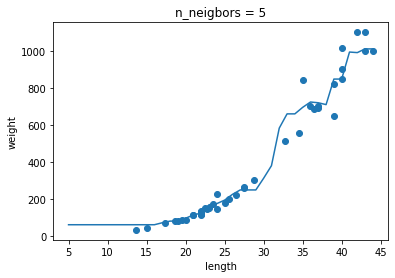

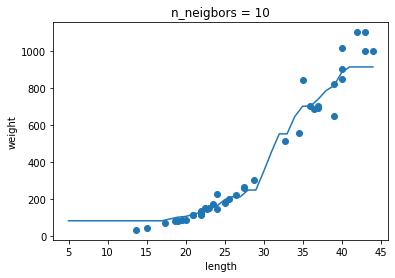

In [68]:
knr = KNeighborsRegressor()

x = np.arange(5,45).reshape(-1,1)

for n in [1,5,10]: 
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neigbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

In [73]:
for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  print('이웃의 개수가 %0d일때, 훈련세트 점수 : %f, 테스트세트 점수:%f ' %(n, knr.score(train_input, train_target), knr.score(test_input,test_target)))

이웃의 개수가 1일때, 훈련세트 점수 : 0.985283, 테스트세트 점수:0.991309 
이웃의 개수가 5일때, 훈련세트 점수 : 0.969882, 테스트세트 점수:0.992809 
이웃의 개수가 10일때, 훈련세트 점수 : 0.961646, 테스트세트 점수:0.973791 
